In [1]:
import pandas as pd
from os import path
import json

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../../data"

In [3]:
seeds = [4, 18, 27, 36, 42]

In [4]:
split_results = {}
for seed in seeds:
    results_a = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/protein_bert", 
        f"{str(seed)}a", 
        "all.csv"
    ), sep="\t", header=None)
    results_b = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/protein_bert", 
        f"{str(seed)}b", 
        "all.csv"
    ), sep="\t", header=None)
    results_a.columns = ["model_name", "patience_stop", "patience_lr", "lr", "F1", "MCC", "Acc", "Precision", "Recall", "AUC"]
    results_b.columns = ["model_name", "patience_stop", "patience_lr", "lr", "F1", "MCC", "Acc", "Precision", "Recall", "AUC"]
    
    split_results[str(seed) + "a"] = results_a    
    split_results[str(seed) + "b"] = results_b

In [5]:
df_list = [value for key, value in split_results.items()]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)

In [6]:
df_concat

,model_name,patience_stop,patience_lr,lr,F1,MCC,Acc,Precision,Recall,AUC
0,protein_bert,3,3,0.00001,0.062500,0.157524,0.770992,1.000000,0.032258,0.516129
1,protein_bert,3,3,0.00005,0.236364,0.264185,0.786260,0.764706,0.139785,0.563226
2,protein_bert,3,3,0.00010,0.333333,0.322143,0.796438,0.740741,0.215054,0.595860
3,protein_bert,3,3,0.00050,0.333333,0.322143,0.796438,0.740741,0.215054,0.595860
4,protein_bert,4,3,0.00001,0.155340,0.214179,0.778626,0.800000,0.086022,0.539677
...,...,...,...,...,...,...,...,...,...,...
11,protein_bert,6,3,0.00050,0.000000,0.000000,0.765789,0.000000,0.000000,0.500000
12,protein_bert,8,4,0.00001,0.168224,0.139946,0.765789,0.500000,0.101124,0.535098
13,protein_bert,8,4,0.00005,0.220183,0.203581,0.776316,0.600000,0.134831,0.553670
14,protein_bert,8,4,0.00010,0.247934,0.167936,0.760526,0.468750,0.168539,0.555060


In [7]:
grouped = df_concat.groupby(["patience_stop", "patience_lr", "lr"])
df_means = grouped.mean()

In [9]:
# Means across the different data splits
df_means

F1       MCC       Acc  Precision  \
patience_stop patience_lr lr                                                 
3             3           0.00001  0.121766  0.155733  0.801810   0.651445   
                          0.00005  0.212892  0.184282  0.800152   0.475879   
                          0.00010  0.245131  0.215820  0.802415   0.526614   
                          0.00050  0.179402  0.171927  0.803384   0.472954   
4             3           0.00001  0.196399  0.205698  0.802668   0.651509   
                          0.00005  0.204310  0.200869  0.801821   0.602133   
                          0.00010  0.274351  0.230110  0.801969   0.555414   
                          0.00050  0.276936  0.226801  0.796067   0.528858   
6             3           0.00001  0.169943  0.170772  0.802901   0.537209   
                          0.00005  0.223157  0.214697  0.803296   0.601702   
                          0.00010  0.278487  0.237982  0.801701   0.563502   
                          0.00050  0.230972  0.193256  0.797988   0.478511   
8             4           0.00001  0.251841  0.223730  0.801798   0.573507   
                          0.00005  0.274126  0.225966  0.798179   0.539510   
                          0.00010  0.300830  0.237983  0.798128   0.523262   
                          0.00050  0.273190  0.230439  0.801767   0.546453   

                                     Recall       AUC  
patience_stop patience_lr lr                           
3             3           0.00001  0.070294  0.529458  
                          0.00005  0.143903  0.556140  
                          0.00010  0.169222  0.567390  
                          0.00050  0.117709  0.547837  
4             3           0.00001  0.121132  0.548894  
                          0.00005  0.131638  0.552354  
                          0.00010  0.198241  0.577577  
                          0.00050  0.213362  0.580451  
6             3           0.00001  0.104442  0.542596  
                          0.00005  0.141581  0.556770  
                          0.00010  0.195126  0.576538  
                          0.00050  0.158166  0.560412  
8             4           0.00001  0.166608  0.565456  
                          0.00005  0.193364  0.573640  
                          0.00010  0.219323  0.583247  
                          0.00050  0.192944  0.575611

In [10]:
df_means.round(3).to_csv(path.join(DATA_DIR, "evaluations/protein_bert/5x2cv_means.csv"))

In [11]:
df_means.round(3).to_csv(path.join(DATA_DIR, "evaluations/protein_bert/5x2cv_means_excel.csv"), sep="\t")

In [12]:
f1_df = pd.concat(df_list)[["patience_stop", "patience_lr", "lr", "F1"]]

In [17]:
nice_label = {}
i = 1
for patience in [(3,3), (4,3), (6,3), (8,4)]:
    nice_label[sum(patience)] = {}
    for learning_rate in [1e-5, 5e-5, 1e-4, 5e-4]:
        nice_label[patience[0] + patience[1]][learning_rate] = i
        i += 1

In [20]:
def get_readable_label(row):
    return nice_label[row["patience_stop"] + row["patience_lr"]][row["lr"]]

In [21]:
f1_df["label"] = f1_df.apply(get_readable_label, axis=1)

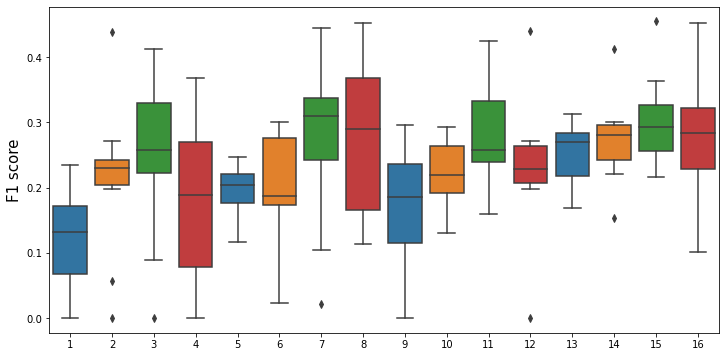

In [27]:
plt.figure(figsize=(12,6))
order = range(1, 17)
ax = sns.boxplot(x="label", y="F1", data=f1_df, order=order, palette=sns.color_palette("tab10")[:4])
#labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
#ax.set_xticklabels(order, rotation = 90)
ax.set_xlabel("")
ax.set_ylabel("F1 score", size=15)
#ax.set_title("Boxplot of F1 scores of ProteinBERT models trained on 5x2cv", size=20)
#ax.yaxis.grid(False)
#ax.xaxis.grid(True)
#ax.set_axisbelow(True)
plt.savefig(path.join(DATA_DIR, "images/box_f1_of_5x2cv_proteinbert.png"), bbox_inches='tight')
plt.show()

In [22]:
from statistics import mean
from sklearn.metrics import accuracy_score
import numpy as np
import csv
import scipy.stats
import itertools
from sklearn.model_selection import train_test_split

In [23]:
test_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/crossval/chen_4_b.csv"), index_col=0).sort_index()
valid_data, test_data = train_test_split(
        test_data, test_size=0.6, random_state=333, stratify=test_data["Y"]
    )
test_data

,Antibody_ID,heavy,light,Y,cluster
1717,5i1g,EVQLVETGGGLIQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,0,8
310,1psk,EVQLQQSGPELVKPGASVKISCKTSGYTFTKYTMHWVKQSHGKSLE...,QIVLTQSPAIMSASPGEKVTITCSASSSVSNIHWFQQKPGTFPKLW...,1,655
2366,6nou,QVQLVQSGAEVKKPGSSVKVSCKASGYSFTDYHIHWVRQAPGQCLE...,DIVMTQTPLSLSVTPGQPASISCRSSRSLVHSRGNTYLHWYLQKPG...,0,192
987,3se9,QVQLVQSGSGVKKPGASVRVSCWTSEDIFERTELIHWVRQAPGQGL...,EIVLTQSPGTLSLSPGETASLSCTAASYGHMTWYQKKPGQPPKLLI...,0,848
2317,6mlk,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,DVVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,0,308
...,...,...,...,...,...
2174,6cyf,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMDWVRQAPGKGLE...,AIQMTQSPSSLSASVGDRVTITCRASQGIRNDLGWYQQKPGKAPKL...,0,396
1156,4h20,EVQLQQSGPVLVKPGASVKMSCKASGYTFTDYYVNWVKQSRGKSLE...,DIVMTQSHKFMSTSVGDRVSITCKASQDVTSAVAWFQQKPGQSPKL...,0,75
285,1nmc,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,1,442
504,2dqf,DVQLQESGPSLVKPSQTLSLTCSVTGDSITSDAWSWIRKFPGNRLE...,DIVLTQSPATLSVTPGNSVSLSCRASQSIGNNLHWYQQKSHESPRL...,0,28


In [14]:
patience = [(3,3), (4,3), (6,3), (8,4)]
learning_rate = [1e-5, 5e-5, 1e-4, 5e-4]

In [15]:
y_preds = []
i = 0
for pat in patience:
    for lr in learning_rate:
        i += 1
        with open(path.join(DATA_DIR, f"evaluations/protein_bert/4a/2022_04_21_{pat[0]}_{pat[1]}_{lr}_preds.csv"), "r") as f:
            reader = csv.reader(f)
            row = [int(num) for num in next(reader)]
            
            y_preds.append(np.array(row))

In [16]:
print(len(y_preds))

16


In [24]:
y_true = np.array(test_data["Y"])

In [18]:
# Looney 1988
# https://www.sciencedirect.com/science/article/pii/0167865588900165
def ftest_compact(y_test, test_preds):
    n = len(y_test)
    accuracies = [accuracy_score(y_test, pred) for pred in test_preds]
    avg_acc = mean(accuracies)
    count = len(test_preds)
    m = []
    ssa = (n * sum(acc**2 for acc in accuracies)) - (n * count * avg_acc**2)
    
    for j in range(n):
        mj = sum([1 for preds in test_preds if preds[j] == y_test[j]])
        m.append(mj)
        
    ssb = (1. / count) * sum(mj ** 2 for mj in m) - (count * n * avg_acc ** 2)
    sst = count * n * avg_acc * (1 - avg_acc)
    ssab = sst - ssa - ssb
    msa = ssa / (count - 1)
    msab = ssab / ((count - 1)*(n - 1))
    f = msa / msab
    
    degrees_of_freedom_1 = count - 1
    degrees_of_freedom_2 = degrees_of_freedom_1 * n

    p_value = scipy.stats.f.sf(f, degrees_of_freedom_1, degrees_of_freedom_2)

    return f, p_value

In [21]:
len(y_preds[0])

393

In [25]:
f, p_value = ftest_compact(y_true, y_preds)

In [26]:
p_value

0.001958066800227276

In [27]:
f

2.3840277401524888

In [28]:
seeds = [4, 18, 27, 36, 42]

In [70]:
def prepare_test_metrics(pat_a, lr_a, pat_b, lr_b):
    metrics_a = np.zeros((5,2))
    metrics_b = np.zeros((5,2))
    i = 0
    for seed in seeds:
        for j, letter in enumerate(["a", "b"]):
            res = split_results[str(seed) + letter]
            f1_a = res[(res["patience_stop"] == pat_a[0]) & (res["patience_lr"] == pat_a[1]) & (res["lr"] == lr_a)]["F1"]
            f1_b = res[(res["patience_stop"] == pat_b[0]) & (res["patience_lr"] == pat_b[1]) & (res["lr"] == lr_b)]["F1"]
            metrics_a[i][j] = f1_a
            metrics_b[i][j] = f1_b
        i += 1
    return metrics_a, metrics_b

In [61]:
pat_a = (3,3)
lr_a = 1e-5
res = split_results["4a"]
f1_a = res[(res["patience_stop"] == pat_a[0]) & (res["patience_lr"] == pat_a[1]) & (res["lr"] == lr_a)]["F1"].item()
f1_b = res[(res["patience_stop"] == 4) & (res["patience_lr"] == 3) & (res["lr"] == 0.0001)]["F1"].item()
f1_b

0.3937007874015747

In [29]:
def paired_f_test(metrics_a, metrics_b):
    s = []
    diffs = []
    for i in range(5):
        p_0 = metrics_a[i][0] - metrics_b[i][0]
        p_1 = metrics_a[i][1] - metrics_b[i][1]
        p_avg = mean([p_0, p_1])
        s2 = (p_0 - p_avg) ** 2 + (p_1 - p_avg) ** 2
        s.append(s2)
        diffs += [p_0, p_1]
        
    f = sum(p ** 2 for p in diffs) / (2 * sum(s))
    p_value = scipy.stats.f.sf(f, 10, 5)
    return f, p_value

In [71]:
met_a, met_b = prepare_test_metrics((3,3), 1e-5, (4,3), 1e-4)
paired_f_test(met_a, met_b)

(2.88993716029002, 0.126518234620923)

In [72]:
from statsmodels.stats.multitest import multipletests

In [73]:
model_list = [
    (pat, lr) for pat in patience 
    for dat in learning_rate
]
len(model_list)

16

In [74]:
p_values = []
tested_models = []

for i, comb_1 in enumerate(model_list):
    for comb_2 in model_list[i:]:
        pat_1, lr_1 = comb_1
        pat_2, lr_2 = comb_2
        if pat_1 != pat_2 or lr_1 != lr_2:
            tested_models.append((comb_1, comb_2))
            met_1, met_2 = prepare_test_metrics(pat_1, lr_1, pat_2, lr_2)
            f, p = paired_f_test(met_1, met_2)
            p_values.append(p)

In [75]:
print(min(p_values))
max(p_values)

0.012802405299403895


0.6445377765356324

In [76]:
reject, p_vals_corr, _, _ = multipletests(p_values, 0.05, "fdr_bh")

In [77]:
sum(reject)

0

In [78]:
len(p_vals_corr)

96

In [79]:
print(min(p_vals_corr))
max(p_vals_corr)

0.07681443179642337


0.6445377765356324